In [1]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
xtr, xte, ytr, yte = train_test_split(x,y,stratify=y,random_state=42)


In [2]:
#generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
#divide numbers ranging from  0 to len(X_train) into groups= folds

neigh = KNeighborsClassifier()
params = {'n_neighbors':list(sorted(np.random.randint(1,20,10)))}
folds = 7

In [3]:
params

{'n_neighbors': [2, 5, 6, 8, 10, 14, 14, 17, 18, 19]}

In [4]:
#for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows

        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and test accuracies

        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find train and test accuracies

        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and test accuracies
        # based on the 'folds' value we will do the same procedure

        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
# return both "train_scores" and "test_scores"
def RandomSearchCV(x_train,y_train,classifier, params, folds):
    trainscores = []
    testscores  = []    
    for k in tqdm(params['n_neighbors']):
        trainscores_folds = []
        testscores_folds  = []
        all_index= np.arange((len(xtr)))
        ran= len(xtr)//folds 
        for j in range(0, folds):
            start=j*ran
            test_indices  = np.arange(start,start+ran)
            train_indices = np.setdiff1d(all_index,test_indices) 

            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]

            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores

In [5]:
folds

7

100%|██████████| 10/10 [00:38<00:00,  3.84s/it]


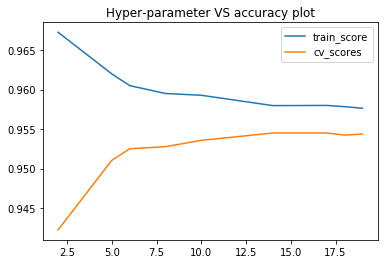

In [6]:
#call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
train_score,cv_scores = RandomSearchCV(xtr, ytr, neigh, params, folds)

plt.plot(params['n_neighbors'],train_score, label='train_score')
plt.plot(params['n_neighbors'],cv_scores, label='cv_scores')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()


In [7]:
#plot the decision boundaries for the model initialized with the best hyperparameter
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

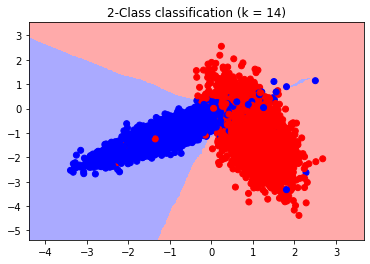

In [9]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 14)
neigh.fit(xtr, ytr)
plot_decision_boundary(xtr[:, 0], xtr[:, 1], ytr, neigh)